# HM1: Logistic Regression.

### Name: [Meijie Shih]


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [2]:
# Load Packages
import pandas as pd
import numpy as np

# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [3]:
df = pd.read_csv('data.csv')

## 1.2 Examine and clean data

In [4]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.

In [5]:
# Show the dataframe to determine which columns need to be dropped
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Drop id, diagnosis, and last column to be features data X
X = np.array(df.iloc[:, 2:-1])

In [7]:
# Extract diagnosis column to be target data y and replace B to 1 and M to -1
y = np.array(df[['diagnosis']].replace(['B', 'M'], [1, -1]))

## 1.3. Partition to training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [9]:
# Standardization
import numpy as np

# calculate mu and sig using the training set
d = X_train.shape[1]
mu = np.mean(X_train, axis=0)#.reshape(1, d)
sig = np.std(X_train, axis=0)#.reshape(1, d)

# transform the training features
X_train = (X_train - mu) / (sig + 1E-6)

# transform the test features
X_test = (X_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(X_test, axis=0))

print('test std = ')
print(np.std(X_test, axis=0))

test mean = 
[-0.00024445  0.14826429 -0.00353282 -0.01481521 -0.0262478  -0.05810511
 -0.03074141 -0.01924486 -0.01651419  0.00676093  0.00931579  0.08288839
 -0.00169902 -0.02343591  0.18908379  0.01768579  0.00452528  0.05494459
 -0.07110685  0.08792898 -0.01476948  0.12594987 -0.01357586 -0.03847506
  0.00105513 -0.0256163  -0.02536776  0.00747598 -0.04023539  0.0636219 ]
test std = 
[0.9487605  0.94746264 0.96063229 0.93167653 1.02957082 1.01784876
 1.05872285 1.07542652 0.96119461 0.8645923  0.88477473 1.00761441
 0.84830266 0.75619376 1.43717426 1.04804442 0.87727085 0.98220824
 0.92870726 0.93046456 0.90106296 0.99649737 0.92431361 0.84418793
 1.05408113 0.99814382 0.99688298 1.00308213 0.95284328 1.02247619]


In [10]:
# Concatenate number 1 to first column
A = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [11]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix 30 by 1
#     x: data: n-by-d matrix 455 by 30
#     y: label: n-by-1 matrix 455 by 1
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = x.shape[0]
    obj = 0
    
    for i in range(n):
        obj += np.log(1 + np.e ** (-y[i] * x[i].T @ w))
    
    return (obj / n) + (lam * (w.T @ w) / 2)

In [1]:
def objective2(w, x, y, lam):
    n = x.shape[0]
    Z = (1/n) * np.sum(np.log(1+np.exp(-y * x.dot(w)))) + (lam/2) * np.sum(w[1:]**2)
    return Z

In [ ]:
weight = np.zeros((30,))


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [12]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = x.shape[0]
    grad = 0
    
    for i in range(n):
        grad += (y[i] * x[i]) / (1 + np.e ** (y[i] * x[i].T @ w))
    
    return (grad / -n) + (lam * w)

In [13]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    obj_history = np.zeros((max_epoch, 1))
    
    for iter in range(max_epoch):
        w -= learning_rate * gradient(w, x, y, lam)
        obj_history[iter] = objective(w, x, y, lam)
        
    return w, obj_history

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [14]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.zeros((31,))
w_gd_lr, obj_gd_lr= gradient_descent(A, y_train, 0, 0.03, weight, max_epoch=100)

In [15]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.ones((31,))
w_gd_rlr, obj_gd_rlr = gradient_descent(A, y_train, 1, 0.03, weight, max_epoch=100)

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [16]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    obj = np.log(1 + np.e ** (-yi[0] * xi[0].T @ w)) + (lam * (w.T @ w) / 2)

    grad = (-yi[0] * xi[0]) / (1 + np.e ** (yi[0] * xi[0].T @ w)) + (lam * w)
   
    return grad, obj

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [17]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)
def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    data = np.c_[y, x]
    n = data.shape[0]
    batch_size = 1
    obj_history = np.zeros((max_epoch, 1))
    
    for iter in range(max_epoch):
        np.random.shuffle(data)
        obj = 0
        for j in range(0, n, batch_size):
            xi = data[j:j+batch_size, 1:]
            yi = data[j:j+batch_size, 0]
            grad, obj_i = stochastic_objective_gradient(w, xi, yi, lam)
            obj += obj_i
            w -= learning_rate * grad
        obj_history[iter] = obj
        
    return w, obj_history

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [18]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.ones((31,))
w_sgd_lr, obj_sgd_lr = sgd(A, y_train, 0, 0.03, weight, max_epoch=100)

In [19]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.ones((31,))
w_sgd_rlr, obj_sgd_rlr = sgd(A, y_train, 1, 0.03, weight, max_epoch=100)

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [20]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    b = xi.shape[0]
    
    obj = 0
    for j in range(b):
        obj += np.log(1 + np.e ** (-yi[j] * xi[j].T @ w))
    obj = obj / b + (lam * (w.T @ w) / 2)

    grad = 0
    for k in range(b):
        grad += (-yi[k] * xi[k]) / (1 + np.e ** (yi[k] * xi[k].T @ w))
    grad = (grad / b) + (lam * w)
   
    return grad, obj

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [21]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    data = np.c_[y, x]
    n = data.shape[0]
    batch_size = 35
    obj_history = np.zeros((max_epoch, 1))
    
    for iter in range(max_epoch):
        np.random.shuffle(data)
        obj = 0
        for j in range(0, n, batch_size):
            xi = data[j:j+batch_size, 1:]
            yi = data[j:j+batch_size, 0]
            grad, obj_i = mb_objective_gradient(w, xi, yi, lam)
            obj += obj_i
            w -= learning_rate * grad
        obj_history[iter] = obj
        
    return w, obj_history

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [22]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.ones((31,))
w_mbgd_lr, obj_mbgd_lr = mbgd(A, y_train, 0, 0.03, weight, max_epoch=100)

In [23]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
weight = np.ones((31,))
w_mbgd_rlr, obj_mbgd_rlr = mbgd(A, y_train, 1, 0.03, weight, max_epoch=100)

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

Non-regularized

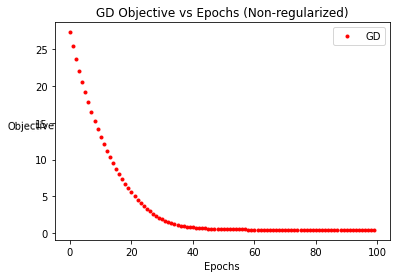

In [25]:
epochs = 100
plt.title('GD Objective vs Epochs (Non-regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_gd_rlr, 'r.', label='GD')
plt.legend()
plt.show()

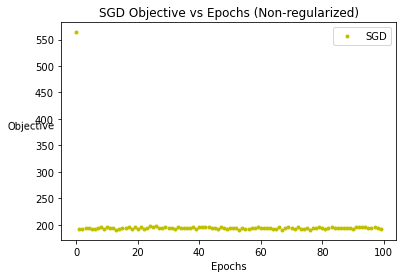

In [26]:
epochs = 100
plt.title('SGD Objective vs Epochs (Non-regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_sgd_rlr, 'y.', label='SGD')
plt.legend()
plt.show()

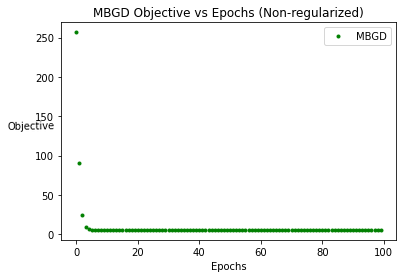

In [27]:
epochs = 100
plt.title('MBGD Objective vs Epochs (Non-regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_mbgd_rlr, 'g.', label='MBGD')
plt.legend()
plt.show()

Regularized

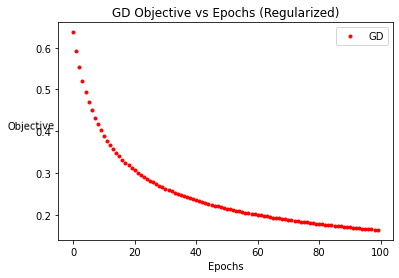

In [58]:
epochs = 100
plt.title('GD Objective vs Epochs (Regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_gd_lr, 'r.', label='GD')
plt.legend()
plt.show()

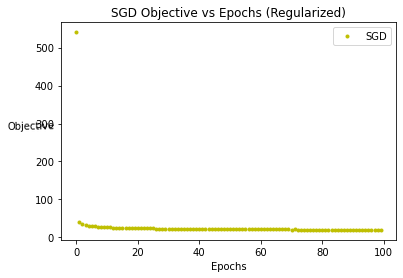

In [59]:
epochs = 100
plt.title('SGD Objective vs Epochs (Regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_sgd_lr, 'y.', label='SGD')
plt.legend()
plt.show()

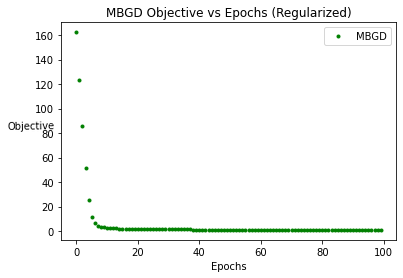

In [60]:
epochs = 100
plt.title('MBGD Objective vs Epochs (Regularized)')
plt.ylabel('Objective', rotation=True)
plt.xlabel('Epochs')
plt.plot(range(epochs), obj_mbgd_lr, 'g.', label='MBGD')
plt.legend()
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Concatenate number 1 to first column
B = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [33]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    pred = X @ w
    
    for i in range(pred.shape[0]):
        if pred[i] >= 0:
            pred[i] = 1
        else:
            pred[i] = -1
    
    return pred

In [34]:
# evaluate training error of logistric regression and regularized version
pred_train_gd_lr = predict(w_gd_lr, A)
pred_train_gd_rlr = predict(w_gd_rlr, A)

pred_train_sgd_lr = predict(w_sgd_lr, A)
pred_train_sgd_rlr = predict(w_sgd_rlr, A)

pred_train_mbgd_lr = predict(w_mbgd_lr, A)
pred_train_mbgd_rlr = predict(w_mbgd_rlr, A)

print('Accuracy of train GD:', accuracy_score(y_train, pred_train_gd_lr))
print('Accuracy of train SGD:', accuracy_score(y_train, pred_train_sgd_lr))
print('Accuracy of train MBGD:', accuracy_score(y_train, pred_train_mbgd_lr))

print('Accuracy of train regularized GD:', accuracy_score(y_train, pred_train_gd_rlr))
print('Accuracy of train regularized SGD:', accuracy_score(y_train, pred_train_sgd_rlr))
print('Accuracy of train regularized MBGD:', accuracy_score(y_train, pred_train_mbgd_rlr))

Accuracy of train GD: 0.967032967032967
Accuracy of train SGD: 0.989010989010989
Accuracy of train MBGD: 0.9824175824175824
Accuracy of train regularized GD: 0.9538461538461539
Accuracy of train regularized SGD: 0.9494505494505494
Accuracy of train regularized MBGD: 0.9560439560439561


In [35]:
# evaluate testing error of logistric regression and regularized version
pred_test_gd_lr = predict(w_gd_lr, B)
pred_test_gd_rlr = predict(w_gd_rlr, B)

pred_test_sgd_lr = predict(w_sgd_lr, B)
pred_test_sgd_rlr = predict(w_sgd_rlr, B)

pred_test_mbgd_lr = predict(w_mbgd_lr, B)
pred_test_mbgd_rlr = predict(w_mbgd_rlr, B)

print('Accuracy of test GD:', accuracy_score(y_test, pred_test_gd_lr))
print('Accuracy of test SGD:', accuracy_score(y_test, pred_test_sgd_lr))
print('Accuracy of test MBGD:', accuracy_score(y_test, pred_test_mbgd_lr))

print('Accuracy of test regularized GD:', accuracy_score(y_test, pred_test_gd_rlr))
print('Accuracy of test regularized SGD:', accuracy_score(y_test, pred_test_sgd_rlr))
print('Accuracy of test regularized MBGD:', accuracy_score(y_test, pred_test_mbgd_rlr))

Accuracy of test GD: 0.9649122807017544
Accuracy of test SGD: 0.9736842105263158
Accuracy of test MBGD: 0.9824561403508771
Accuracy of test regularized GD: 0.9473684210526315
Accuracy of test regularized SGD: 0.9385964912280702
Accuracy of test regularized MBGD: 0.956140350877193


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

### GD

Tuning lambda and set learning rate to be 0.03.

In [36]:
domain = np.linspace(0, 10, 50)
n = len(domain)

GD_lambda_history_train = np.zeros((n, 1))

for idx, lam in enumerate(domain):
    weight = np.ones((31,))
    w_gd_lam, obj_gd_lam = gradient_descent(A, y_train, lam, 0.03, weight, max_epoch=100)
    
    pred_train_gd_lam = predict(w_gd_lam, A)
    
    GD_lambda_history_train[idx] = accuracy_score(y_train, pred_train_gd_lam)

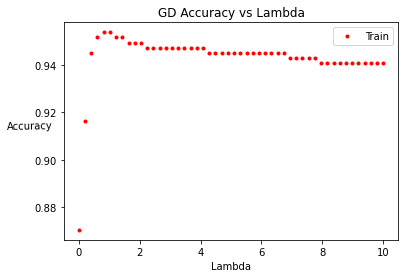

In [37]:
domain = np.linspace(0, 10, 50)

plt.title('GD Accuracy vs Lambda')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Lambda')
plt.plot(domain, GD_lambda_history_train, 'r.', label='Train')
plt.legend()
plt.show()

When lambda around 1, the model has the highest accuracy of prediction in either train and test.

I set lambda to 1 then try the learning rate between 0.01 to 1

In [38]:
domain = np.linspace(0.01, 1, 50)
n = len(domain)

GD_learn_history_train = np.zeros((n, 1))

for idx, learning in enumerate(domain):
    weight = np.ones((31,))
    w_gd_learn, obj_gd_learn = gradient_descent(A, y_train, 1, learning, weight, max_epoch=100)
    
    pred_train_gd_learn = predict(w_gd_learn, A)
    
    GD_learn_history_train[idx] = accuracy_score(y_train, pred_train_gd_learn)

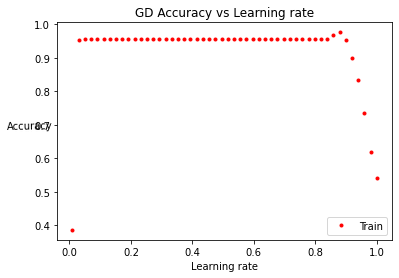

In [39]:
domain = np.linspace(0.01, 1, 50)

plt.title('GD Accuracy vs Learning rate')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Learning rate')
plt.plot(domain, GD_learn_history_train, 'r.', label='Train')
plt.legend()
plt.show()

As we can see the plot above, the learning rate greater than 0.01 and less than 0.9 have better accuracy of predictions.

In gradient descent section, I would say the best parameters of GD model are lambda = 1 and learning rate = 0.85.

### SGD

Tuning lambda and set learning rate to be 0.03.

In [40]:
domain = np.linspace(0, 10, 50)
n = len(domain)

SGD_lambda_history_train = np.zeros((n, 1))

for idx, lam in enumerate(domain):
    weight = np.ones((31,))
    w_sgd_lam, obj_sgd_lam = sgd(A, y_train, lam, 0.03, weight, max_epoch=100)
    
    pred_train_sgd_lam = predict(w_sgd_lam, A)
    
    SGD_lambda_history_train[idx] = accuracy_score(y_train, pred_train_sgd_lam)

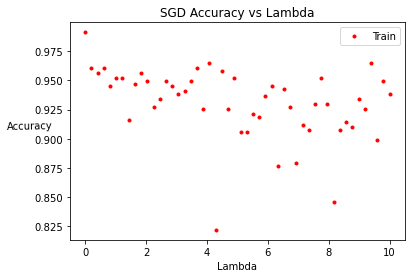

In [41]:
domain = np.linspace(0, 10, 50)

plt.title('SGD Accuracy vs Lambda')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Lambda')
plt.plot(domain, SGD_lambda_history_train, 'r.', label='Train')
plt.legend()
plt.show()

As we can the plot above, there is no pattern on increscent lambda.

The higest accuracy of prediction is lambda = 0, which is non-regularized SGD model, so I set lambda = 0 and try learning rate between 0.01 to 1

In [42]:
domain = np.linspace(0.01, 1, 50)
n = len(domain)

SGD_learn_history_train = np.zeros((n, 1))

for idx, learning in enumerate(domain):
    weight = np.ones((31,))
    w_sgd_learn, obj_sgd_learn = sgd(A, y_train, 0, learning, weight, max_epoch=100)
    
    pred_train_sgd_learn = predict(w_sgd_learn, A)
    
    SGD_learn_history_train[idx] = accuracy_score(y_train, pred_train_sgd_learn)

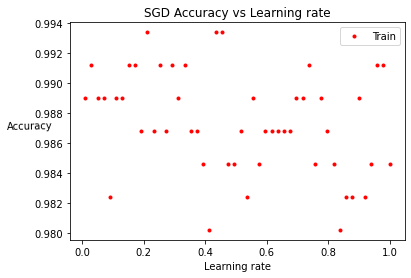

In [43]:
domain = np.linspace(0.01, 1, 50)

plt.title('SGD Accuracy vs Learning rate')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Learning rate')
plt.plot(domain, SGD_learn_history_train, 'r.', label='Train')
plt.legend()
plt.show()

The proper value of learning rate for training set is less than 0.1.

In stochastic gradient descent section, I would say the best parameters of SGD model are lambda = 0 and learning rate = 0.05.

### MBGD

Tuning lambda and set learning rate to be 0.03.

In [44]:
domain = np.linspace(0, 10, 50)
n = len(domain)

MBGD_lambda_history_train = np.zeros((n, 1))

for idx, lam in enumerate(domain):
    weight = np.ones((31,))
    w_mbgd_lam, obj_mbgd_lam = mbgd(A, y_train, lam, 0.03, weight, max_epoch=100)
    
    pred_train_mbgd_lam = predict(w_mbgd_lam, A)
    
    MBGD_lambda_history_train[idx] = accuracy_score(y_train, pred_train_mbgd_lam)

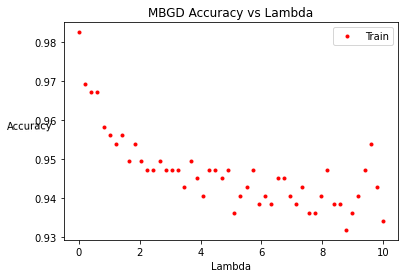

In [45]:
domain = np.linspace(0, 10, 50)

plt.title('MBGD Accuracy vs Lambda')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Lambda')
plt.plot(domain, MBGD_lambda_history_train, 'r.', label='Train')
plt.legend()
plt.show()

The lambda below 3 have better performance than above, but I'd to select lambda = 0 beacuse it has the best performance for training set

In [46]:
domain = np.linspace(0.01, 1, 50)
n = len(domain)

MBGD_learn_history_train = np.zeros((n, 1))

for idx, learning in enumerate(domain):
    weight = np.ones((31,))
    w_mbgd_learn, obj_mbgd_learn = mbgd(A, y_train, 0, learning, weight, max_epoch=100)
    
    pred_train_mbgd_learn = predict(w_mbgd_learn, A)
    
    MBGD_learn_history_train[idx] = accuracy_score(y_train, pred_train_mbgd_learn)

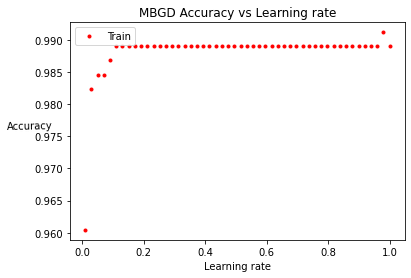

In [47]:
domain = np.linspace(0.01, 1, 50)

plt.title('MBGD Accuracy vs Learning rate')
plt.ylabel('Accuracy', rotation=True)
plt.xlabel('Learning rate')
plt.plot(domain, MBGD_learn_history_train, 'r.', label='Train')
plt.legend()
plt.show()

The proper value of learning rate for training set is around 0.8.

In mini-batch gradient descent section, I would say the best parameters of MBGD model are lambda = 0 and learning rate = 0.80.

### Conclusion

GD: lambda = 1, learning rate = 0.85;

In [48]:
weight = np.ones((31,))
w_gd_best, obj_gd_best = gradient_descent(A, y_train, 1, 0.85, weight, max_epoch=100)

pred_train_gd_best = predict(w_gd_best, A)
pred_test_gd_best = predict(w_gd_best, B)

print('Accuracy of train GD:', accuracy_score(y_train, pred_train_gd_best))
print('Accuracy of test GD:', accuracy_score(y_test, pred_test_gd_best))

Accuracy of train GD: 0.9560439560439561
Accuracy of test GD: 0.956140350877193




SGD: lambda = 0, learning rate = 0.05;

In [49]:
weight = np.ones((31,))
w_sgd_best, obj_sgd_best = sgd(A, y_train, 0, 0.05, weight, max_epoch=100)

pred_train_sgd_best = predict(w_sgd_best, A)
pred_test_sgd_best = predict(w_sgd_best, B)

print('Accuracy of train SGD:', accuracy_score(y_train, pred_train_sgd_best))
print('Accuracy of test SGD:', accuracy_score(y_test, pred_test_sgd_best))

Accuracy of train SGD: 0.9912087912087912
Accuracy of test SGD: 0.9736842105263158


MBGD: lambda = 0, learning rate = 0.80.

In [50]:
weight = np.ones((31,))
w_mbgd_best, obj_mbgd_best = mbgd(A, y_train, 0, 0.80, weight, max_epoch=100)

pred_train_mbgd_best = predict(w_mbgd_best, A)
pred_test_mbgd_best = predict(w_mbgd_best, B)

print('Accuracy of train MBGD:', accuracy_score(y_train, pred_train_mbgd_best))
print('Accuracy of test MBGD:', accuracy_score(y_test, pred_test_mbgd_best))

Accuracy of train MBGD: 0.989010989010989
Accuracy of test MBGD: 0.9824561403508771


In conclusion, the parameters that I selected are NOT the best because the training and test set are different if I run train_test_split() function. 

Therefore, the parameters are only proper in this assignment.

Another fact the I found is that the MBGD has the highest speed of training time, this fact follows the definition of MBGD.